<a href="https://colab.research.google.com/github/maitri799/Walmart_sales-Data_analysis/blob/maitri-dev/IS_407_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IS 407 Project Notebook

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/maitri799/Walmart_sales-Data_analysis/main/summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df2 = df[['units_sold','product_id', 'price','rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count','rating_one_count', 'uses_ad_boosts', 'badge_local_product','merchant_rating_count','merchant_rating','countries_shipped_to','product_variation_inventory','shipping_option_price']].dropna()
df2

,units_sold,product_id,price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,uses_ad_boosts,badge_local_product,merchant_rating_count,merchant_rating,countries_shipped_to,product_variation_inventory,shipping_option_price
0,100,5e9ae51d43d6a96e303acdb0,16.00,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,568,4.128521,34,50,4
1,20000,58940d436a0d3d5da4e95a38,8.00,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,1,0,17752,3.899673,41,50,2
2,100,5ea10e2c617580260d55310a,8.00,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,295,3.989831,36,1,3
3,5000,5cedf17ad1d44c52c59e4aca,8.00,4.03,579,295.0,119.0,87.0,42.0,36.0,1,0,23832,4.020435,41,50,2
4,100,5ebf5819ebac372b070b0e70,2.72,3.10,20,6.0,4.0,2.0,2.0,6.0,1,0,14482,4.001588,35,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,10000,5d5fadc99febd9356cbc52ee,6.00,4.08,1367,722.0,293.0,185.0,77.0,90.0,1,0,5316,4.224605,41,50,2
1569,100,5eccd22b4497b86fd48f16b4,2.00,3.07,28,11.0,3.0,1.0,3.0,10.0,1,0,4435,3.696054,26,2,1
1570,100,5e74be96034d613d42b52dfe,5.00,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,210,3.961905,11,15,2
1571,100,5eda07ab0e295c2097c36590,13.00,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,31,3.774194,29,36,3


In [4]:
product_data = df2[['units_sold', 'product_id', 'price','rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count',
                   'rating_one_count', 'uses_ad_boosts', 'badge_local_product','merchant_rating_count','merchant_rating','countries_shipped_to','product_variation_inventory','shipping_option_price']]
product_data.head()

,units_sold,product_id,price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,uses_ad_boosts,badge_local_product,merchant_rating_count,merchant_rating,countries_shipped_to,product_variation_inventory,shipping_option_price
0,100,5e9ae51d43d6a96e303acdb0,16.00,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,568,4.128521,34,50,4
1,20000,58940d436a0d3d5da4e95a38,8.00,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,1,0,17752,3.899673,41,50,2
2,100,5ea10e2c617580260d55310a,8.00,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,295,3.989831,36,1,3
3,5000,5cedf17ad1d44c52c59e4aca,8.00,4.03,579,295.0,119.0,87.0,42.0,36.0,1,0,23832,4.020435,41,50,2
4,100,5ebf5819ebac372b070b0e70,2.72,3.10,20,6.0,4.0,2.0,2.0,6.0,1,0,14482,4.001588,35,1,1


In [5]:
product_data.isnull().sum()

units_sold                     0
product_id                     0
price                          0
rating                         0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
uses_ad_boosts                 0
badge_local_product            0
merchant_rating_count          0
merchant_rating                0
countries_shipped_to           0
product_variation_inventory    0
shipping_option_price          0
dtype: int64

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

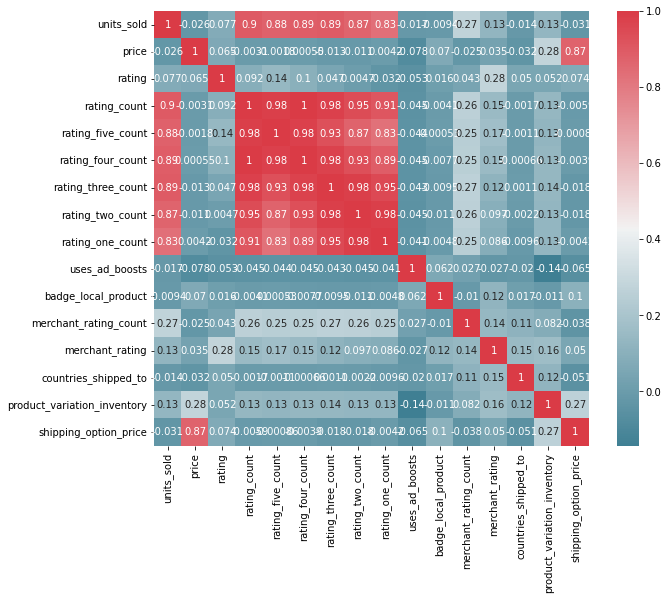

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = product_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

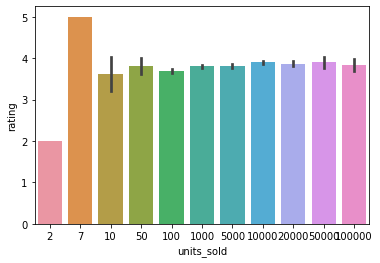

In [8]:
sns.barplot(data = product_data, x = 'units_sold', y = 'rating')

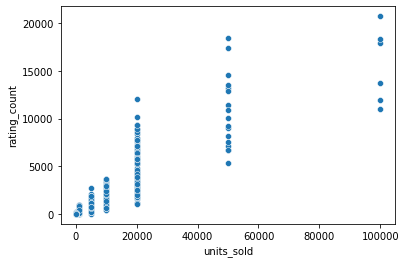

In [9]:
sns.scatterplot(data = product_data, x = 'units_sold', y = 'rating_count')

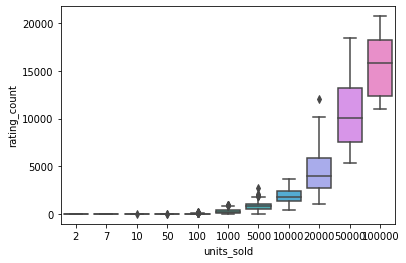

In [10]:
sns.boxplot(data = product_data, x = 'units_sold', y = 'rating_count')

In [11]:
rating_total_counts = product_data[['rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count']].sum()
rating_total_counts

rating_one_count      146284.0
rating_two_count       97351.0
rating_three_count    205592.0
rating_four_count     274428.0
rating_five_count     675779.0
dtype: float64

In [12]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import jarque_bera
from scipy.stats import spearmanr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
X = product_data.loc[:, ["units_sold"]]
Y = product_data.loc[:,["rating_count"]]
linear_model = lm.LinearRegression()
linear_model.fit(X, Y)

print("""intercept: %.2f
absences: %.2f
""" % (tuple([linear_model.intercept_]) + tuple(linear_model.coef_)))

results = smf.ols('units_sold ~ rating_count', data=product_data).fit()
print(results.summary())

intercept: 64.57
absences: 0.19

                            OLS Regression Results                            
Dep. Variable:             units_sold   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     6419.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:30:05   Log-Likelihood:                -14896.
No. Observations:                1528   AIC:                         2.980e+04
Df Residuals:                    1526   BIC:                         2.981e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      

In [14]:
# dividing the dataset into dependent and independent variables

x = product_data.loc[:,['rating_count','rating_one_count','rating_two_count','rating_three_count','rating_four_count','rating_five_count']]
y = product_data.loc[:,['units_sold']]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1528, 6)
(1528, 1)


In [15]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1222, 6)
(1222, 1)
(306, 6)
(306, 1)


In [16]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))


Training accuracy : 0.7176759410801964
Testing accuracy : 0.6209150326797386
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        11
          50       0.00      0.00      0.00        17
         100       0.62      0.99      0.76        97
        1000       0.71      0.45      0.55        75
        5000       0.64      0.58      0.61        50
       10000       0.63      0.51      0.57        37
       20000       0.52      0.65      0.58        17
       50000       0.00      0.00      0.00         0
      100000       1.00      1.00      1.00         1

    accuracy                           0.62       306
   macro avg       0.41      0.42      0.41       306
weighted avg       0.58      0.62      0.58       306



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di